In [ ]:

'''
참고 블로그

'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
from keras.datasets import mnist

In [96]:
test = mnist.load_data()

11493376/11490434 [==============================] - 20s 2us/step


In [102]:
(test,_),(_,_) = mnist.load_data()

In [103]:
test.shape

(60000, 28, 28)

In [2]:
from keras.layers import Conv2D,Dropout, Flatten,Activation, Input,Dense
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, Reshape
from keras.optimizers import Adam
from keras.models import Sequential , Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D

C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train = pd.read_csv("../../mnist_train.csv")

In [4]:
class GAN:
    def __init__(self):
        '''
        mnist img 는 28 * 28
        
        random_number 는 100dim이 적당
        '''
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.latent_dim = 100
        self.img_shape = (self.img_rows,self.img_cols,self.channels)
    
        self.discriminator_optimizer = Adam(0.001)
        self.gan_optimizer = Adam(0.0001)
        self.train_X = None
        self.train_Y = None
        
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss ='mse',optimizer = \
                                  self.discriminator_optimizer, metrics = ['accuracy'])
    
        self.generator = self.build_generator()
        
        gan_input = Input(shape=(self.latent_dim,))
        z = self.generator(gan_input)
        z = self.discriminator(z)
        self.gan_model = Model(gan_input, z)
        self.gan_model.compile(loss='mse', optimizer = self.gan_optimizer)
        #self.gan_model.summary()
        
    def data_setting(self, train_X,train_Y):
        self.train_X = train_X
        self.train_Y = train_Y
        self.train_X = np.array(self.train_X)
        
        self.train_X = self.train_X.reshape(-1,self.img_rows,self.img_cols)
        self.train_X = np.expand_dims(self.train_X,axis=3)
        self.train_X = self.train_X /255
        
    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        #model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    
    def build_discriminator(self):
        model = Sequential()

        model.add(Flatten(input_shape=(self.img_shape)))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        #model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)
    
    
    def train(self,batch_size = 64,epochs=1):
        valid = np.ones((batch_size,1))
        fake = np.zeros((batch_size,1))
        
        for epoch in range(epochs):
            idx = np.random.randint(0, self.train_X.shape[0], batch_size)
            imgs = self.train_X[idx]
            
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            
            gen_imgs = self.generator.predict(noise)
            
            self.discriminator.train_on_batch(imgs, valid)
            self.discriminator.train_on_batch(gen_imgs, fake)
            
            
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
        
            self.gan_model.train_on_batch(noise, valid)
            print(epoch,"/",epochs)
    def output(self):
        noise = np.random.normal(0, 1, (1, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = gen_imgs.reshape(28,28)
        plt.imshow(gen_imgs)
        plt.show()
    

In [5]:
gan = GAN()

In [8]:
train_Y = train.iloc[:,0]
train_X = train.iloc[:,1:]

In [9]:
gan.data_setting(train_X,train_Y)

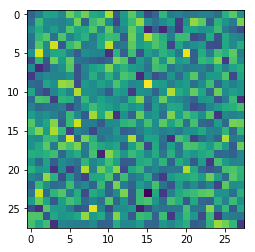

In [10]:
gan.output()

In [155]:
#train_Y =train.iloc[:,0]
#train_X =  train.iloc[:,1:]

In [11]:
gan.train(epochs= 1000)

0 / 1000
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000

757 / 1000
758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000
846 / 1000
847 / 1000

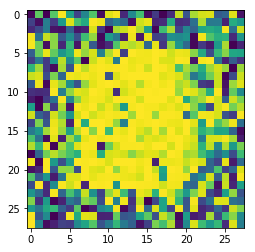

In [21]:
gan.output()

In [22]:
gan.train(epochs= 1000)

0 / 1000
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000

756 / 1000
757 / 1000
758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000
846 / 1000

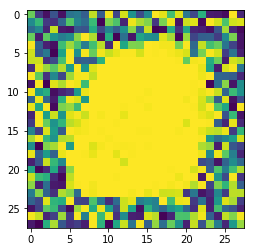

In [60]:
gan.output()

0 / 2000
1 / 2000
2 / 2000
3 / 2000
4 / 2000
5 / 2000
6 / 2000
7 / 2000
8 / 2000
9 / 2000
10 / 2000
11 / 2000
12 / 2000
13 / 2000
14 / 2000
15 / 2000
16 / 2000
17 / 2000
18 / 2000
19 / 2000
20 / 2000
21 / 2000
22 / 2000
23 / 2000
24 / 2000
25 / 2000
26 / 2000
27 / 2000
28 / 2000
29 / 2000
30 / 2000
31 / 2000
32 / 2000
33 / 2000
34 / 2000
35 / 2000
36 / 2000
37 / 2000
38 / 2000
39 / 2000
40 / 2000
41 / 2000
42 / 2000
43 / 2000
44 / 2000
45 / 2000
46 / 2000
47 / 2000
48 / 2000
49 / 2000
50 / 2000
51 / 2000
52 / 2000
53 / 2000
54 / 2000
55 / 2000
56 / 2000
57 / 2000
58 / 2000
59 / 2000
60 / 2000
61 / 2000
62 / 2000
63 / 2000
64 / 2000
65 / 2000
66 / 2000
67 / 2000
68 / 2000
69 / 2000
70 / 2000
71 / 2000
72 / 2000
73 / 2000
74 / 2000
75 / 2000
76 / 2000
77 / 2000
78 / 2000
79 / 2000
80 / 2000
81 / 2000
82 / 2000
83 / 2000
84 / 2000
85 / 2000
86 / 2000
87 / 2000
88 / 2000
89 / 2000
90 / 2000
91 / 2000
92 / 2000
93 / 2000
94 / 2000
95 / 2000
96 / 2000
97 / 2000
98 / 2000
99 / 2000
100 / 2000

756 / 2000
757 / 2000
758 / 2000
759 / 2000
760 / 2000
761 / 2000
762 / 2000
763 / 2000
764 / 2000
765 / 2000
766 / 2000
767 / 2000
768 / 2000
769 / 2000
770 / 2000
771 / 2000
772 / 2000
773 / 2000
774 / 2000
775 / 2000
776 / 2000
777 / 2000
778 / 2000
779 / 2000
780 / 2000
781 / 2000
782 / 2000
783 / 2000
784 / 2000
785 / 2000
786 / 2000
787 / 2000
788 / 2000
789 / 2000
790 / 2000
791 / 2000
792 / 2000
793 / 2000
794 / 2000
795 / 2000
796 / 2000
797 / 2000
798 / 2000
799 / 2000
800 / 2000
801 / 2000
802 / 2000
803 / 2000
804 / 2000
805 / 2000
806 / 2000
807 / 2000
808 / 2000
809 / 2000
810 / 2000
811 / 2000
812 / 2000
813 / 2000
814 / 2000
815 / 2000
816 / 2000
817 / 2000
818 / 2000
819 / 2000
820 / 2000
821 / 2000
822 / 2000
823 / 2000
824 / 2000
825 / 2000
826 / 2000
827 / 2000
828 / 2000
829 / 2000
830 / 2000
831 / 2000
832 / 2000
833 / 2000
834 / 2000
835 / 2000
836 / 2000
837 / 2000
838 / 2000
839 / 2000
840 / 2000
841 / 2000
842 / 2000
843 / 2000
844 / 2000
845 / 2000
846 / 2000

1461 / 2000
1462 / 2000
1463 / 2000
1464 / 2000
1465 / 2000
1466 / 2000
1467 / 2000
1468 / 2000
1469 / 2000
1470 / 2000
1471 / 2000
1472 / 2000
1473 / 2000
1474 / 2000
1475 / 2000
1476 / 2000
1477 / 2000
1478 / 2000
1479 / 2000
1480 / 2000
1481 / 2000
1482 / 2000
1483 / 2000
1484 / 2000
1485 / 2000
1486 / 2000
1487 / 2000
1488 / 2000
1489 / 2000
1490 / 2000
1491 / 2000
1492 / 2000
1493 / 2000
1494 / 2000
1495 / 2000
1496 / 2000
1497 / 2000
1498 / 2000
1499 / 2000
1500 / 2000
1501 / 2000
1502 / 2000
1503 / 2000
1504 / 2000
1505 / 2000
1506 / 2000
1507 / 2000
1508 / 2000
1509 / 2000
1510 / 2000
1511 / 2000
1512 / 2000
1513 / 2000
1514 / 2000
1515 / 2000
1516 / 2000
1517 / 2000
1518 / 2000
1519 / 2000
1520 / 2000
1521 / 2000
1522 / 2000
1523 / 2000
1524 / 2000
1525 / 2000
1526 / 2000
1527 / 2000
1528 / 2000
1529 / 2000
1530 / 2000
1531 / 2000
1532 / 2000
1533 / 2000
1534 / 2000
1535 / 2000
1536 / 2000
1537 / 2000
1538 / 2000
1539 / 2000
1540 / 2000
1541 / 2000
1542 / 2000
1543 / 2000
1544

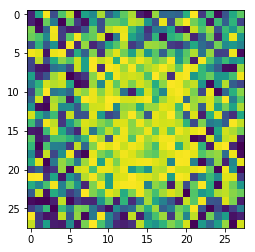

In [61]:
gan.train(epochs= 2000)
gan.output()

0 / 2000
1 / 2000
2 / 2000
3 / 2000
4 / 2000
5 / 2000
6 / 2000
7 / 2000
8 / 2000
9 / 2000
10 / 2000
11 / 2000
12 / 2000
13 / 2000
14 / 2000
15 / 2000
16 / 2000
17 / 2000
18 / 2000
19 / 2000
20 / 2000
21 / 2000
22 / 2000
23 / 2000
24 / 2000
25 / 2000
26 / 2000
27 / 2000
28 / 2000
29 / 2000
30 / 2000
31 / 2000
32 / 2000
33 / 2000
34 / 2000
35 / 2000
36 / 2000
37 / 2000
38 / 2000
39 / 2000
40 / 2000
41 / 2000
42 / 2000
43 / 2000
44 / 2000
45 / 2000
46 / 2000
47 / 2000
48 / 2000
49 / 2000
50 / 2000
51 / 2000
52 / 2000
53 / 2000
54 / 2000
55 / 2000
56 / 2000
57 / 2000
58 / 2000
59 / 2000
60 / 2000
61 / 2000
62 / 2000
63 / 2000
64 / 2000
65 / 2000
66 / 2000
67 / 2000
68 / 2000
69 / 2000
70 / 2000
71 / 2000
72 / 2000
73 / 2000
74 / 2000
75 / 2000
76 / 2000
77 / 2000
78 / 2000
79 / 2000
80 / 2000
81 / 2000
82 / 2000
83 / 2000
84 / 2000
85 / 2000
86 / 2000
87 / 2000
88 / 2000
89 / 2000
90 / 2000
91 / 2000
92 / 2000
93 / 2000
94 / 2000
95 / 2000
96 / 2000
97 / 2000
98 / 2000
99 / 2000
100 / 2000

756 / 2000
757 / 2000
758 / 2000
759 / 2000
760 / 2000
761 / 2000
762 / 2000
763 / 2000
764 / 2000
765 / 2000
766 / 2000
767 / 2000
768 / 2000
769 / 2000
770 / 2000
771 / 2000
772 / 2000
773 / 2000
774 / 2000
775 / 2000
776 / 2000
777 / 2000
778 / 2000
779 / 2000
780 / 2000
781 / 2000
782 / 2000
783 / 2000
784 / 2000
785 / 2000
786 / 2000
787 / 2000
788 / 2000
789 / 2000
790 / 2000
791 / 2000
792 / 2000
793 / 2000
794 / 2000
795 / 2000
796 / 2000
797 / 2000
798 / 2000
799 / 2000
800 / 2000
801 / 2000
802 / 2000
803 / 2000
804 / 2000
805 / 2000
806 / 2000
807 / 2000
808 / 2000
809 / 2000
810 / 2000
811 / 2000
812 / 2000
813 / 2000
814 / 2000
815 / 2000
816 / 2000
817 / 2000
818 / 2000
819 / 2000
820 / 2000
821 / 2000
822 / 2000
823 / 2000
824 / 2000
825 / 2000
826 / 2000
827 / 2000
828 / 2000
829 / 2000
830 / 2000
831 / 2000
832 / 2000
833 / 2000
834 / 2000
835 / 2000
836 / 2000
837 / 2000
838 / 2000
839 / 2000
840 / 2000
841 / 2000
842 / 2000
843 / 2000
844 / 2000
845 / 2000
846 / 2000

1461 / 2000
1462 / 2000
1463 / 2000
1464 / 2000
1465 / 2000
1466 / 2000
1467 / 2000
1468 / 2000
1469 / 2000
1470 / 2000
1471 / 2000
1472 / 2000
1473 / 2000
1474 / 2000
1475 / 2000
1476 / 2000
1477 / 2000
1478 / 2000
1479 / 2000
1480 / 2000
1481 / 2000
1482 / 2000
1483 / 2000
1484 / 2000
1485 / 2000
1486 / 2000
1487 / 2000
1488 / 2000
1489 / 2000
1490 / 2000
1491 / 2000
1492 / 2000
1493 / 2000
1494 / 2000
1495 / 2000
1496 / 2000
1497 / 2000
1498 / 2000
1499 / 2000
1500 / 2000
1501 / 2000
1502 / 2000
1503 / 2000
1504 / 2000
1505 / 2000
1506 / 2000
1507 / 2000
1508 / 2000
1509 / 2000
1510 / 2000
1511 / 2000
1512 / 2000
1513 / 2000
1514 / 2000
1515 / 2000
1516 / 2000
1517 / 2000
1518 / 2000
1519 / 2000
1520 / 2000
1521 / 2000
1522 / 2000
1523 / 2000
1524 / 2000
1525 / 2000
1526 / 2000
1527 / 2000
1528 / 2000
1529 / 2000
1530 / 2000
1531 / 2000
1532 / 2000
1533 / 2000
1534 / 2000
1535 / 2000
1536 / 2000
1537 / 2000
1538 / 2000
1539 / 2000
1540 / 2000
1541 / 2000
1542 / 2000
1543 / 2000
1544

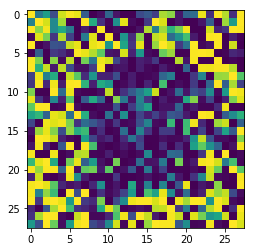

In [62]:
gan.train(epochs= 2000)
gan.output()

0 / 2000
1 / 2000
2 / 2000
3 / 2000
4 / 2000
5 / 2000
6 / 2000
7 / 2000
8 / 2000
9 / 2000
10 / 2000
11 / 2000
12 / 2000
13 / 2000
14 / 2000
15 / 2000
16 / 2000
17 / 2000
18 / 2000
19 / 2000
20 / 2000
21 / 2000
22 / 2000
23 / 2000
24 / 2000
25 / 2000
26 / 2000
27 / 2000
28 / 2000
29 / 2000
30 / 2000
31 / 2000
32 / 2000
33 / 2000
34 / 2000
35 / 2000
36 / 2000
37 / 2000
38 / 2000
39 / 2000
40 / 2000
41 / 2000
42 / 2000
43 / 2000
44 / 2000
45 / 2000
46 / 2000
47 / 2000
48 / 2000
49 / 2000
50 / 2000
51 / 2000
52 / 2000
53 / 2000
54 / 2000
55 / 2000
56 / 2000
57 / 2000
58 / 2000
59 / 2000
60 / 2000
61 / 2000
62 / 2000
63 / 2000
64 / 2000
65 / 2000
66 / 2000
67 / 2000
68 / 2000
69 / 2000
70 / 2000
71 / 2000
72 / 2000
73 / 2000
74 / 2000
75 / 2000
76 / 2000
77 / 2000
78 / 2000
79 / 2000
80 / 2000
81 / 2000
82 / 2000
83 / 2000
84 / 2000
85 / 2000
86 / 2000
87 / 2000
88 / 2000
89 / 2000
90 / 2000
91 / 2000
92 / 2000
93 / 2000
94 / 2000
95 / 2000
96 / 2000
97 / 2000
98 / 2000
99 / 2000
100 / 2000

756 / 2000
757 / 2000
758 / 2000
759 / 2000
760 / 2000
761 / 2000
762 / 2000
763 / 2000
764 / 2000
765 / 2000
766 / 2000
767 / 2000
768 / 2000
769 / 2000
770 / 2000
771 / 2000
772 / 2000
773 / 2000
774 / 2000
775 / 2000
776 / 2000
777 / 2000
778 / 2000
779 / 2000
780 / 2000
781 / 2000
782 / 2000
783 / 2000
784 / 2000
785 / 2000
786 / 2000
787 / 2000
788 / 2000
789 / 2000
790 / 2000
791 / 2000
792 / 2000
793 / 2000
794 / 2000
795 / 2000
796 / 2000
797 / 2000
798 / 2000
799 / 2000
800 / 2000
801 / 2000
802 / 2000
803 / 2000
804 / 2000
805 / 2000
806 / 2000
807 / 2000
808 / 2000
809 / 2000
810 / 2000
811 / 2000
812 / 2000
813 / 2000
814 / 2000
815 / 2000
816 / 2000
817 / 2000
818 / 2000
819 / 2000
820 / 2000
821 / 2000
822 / 2000
823 / 2000
824 / 2000
825 / 2000
826 / 2000
827 / 2000
828 / 2000
829 / 2000
830 / 2000
831 / 2000
832 / 2000
833 / 2000
834 / 2000
835 / 2000
836 / 2000
837 / 2000
838 / 2000
839 / 2000
840 / 2000
841 / 2000
842 / 2000
843 / 2000
844 / 2000
845 / 2000
846 / 2000

1461 / 2000
1462 / 2000
1463 / 2000
1464 / 2000
1465 / 2000
1466 / 2000
1467 / 2000
1468 / 2000
1469 / 2000
1470 / 2000
1471 / 2000
1472 / 2000
1473 / 2000
1474 / 2000
1475 / 2000
1476 / 2000
1477 / 2000
1478 / 2000
1479 / 2000
1480 / 2000
1481 / 2000
1482 / 2000
1483 / 2000
1484 / 2000
1485 / 2000
1486 / 2000
1487 / 2000
1488 / 2000
1489 / 2000
1490 / 2000
1491 / 2000
1492 / 2000
1493 / 2000
1494 / 2000
1495 / 2000
1496 / 2000
1497 / 2000
1498 / 2000
1499 / 2000
1500 / 2000
1501 / 2000
1502 / 2000
1503 / 2000
1504 / 2000
1505 / 2000
1506 / 2000
1507 / 2000
1508 / 2000
1509 / 2000
1510 / 2000
1511 / 2000
1512 / 2000
1513 / 2000
1514 / 2000
1515 / 2000
1516 / 2000
1517 / 2000
1518 / 2000
1519 / 2000
1520 / 2000
1521 / 2000
1522 / 2000
1523 / 2000
1524 / 2000
1525 / 2000
1526 / 2000
1527 / 2000
1528 / 2000
1529 / 2000
1530 / 2000
1531 / 2000
1532 / 2000
1533 / 2000
1534 / 2000
1535 / 2000
1536 / 2000
1537 / 2000
1538 / 2000
1539 / 2000
1540 / 2000
1541 / 2000
1542 / 2000
1543 / 2000
1544

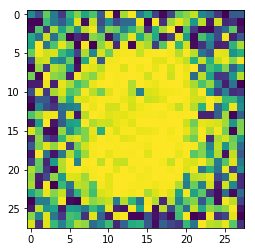

In [63]:
gan.train(epochs= 2000)
gan.output()

0 / 2000
1 / 2000
2 / 2000
3 / 2000
4 / 2000
5 / 2000
6 / 2000
7 / 2000
8 / 2000
9 / 2000
10 / 2000
11 / 2000
12 / 2000
13 / 2000
14 / 2000
15 / 2000
16 / 2000
17 / 2000
18 / 2000
19 / 2000
20 / 2000
21 / 2000
22 / 2000
23 / 2000
24 / 2000
25 / 2000
26 / 2000
27 / 2000
28 / 2000
29 / 2000
30 / 2000
31 / 2000
32 / 2000
33 / 2000
34 / 2000
35 / 2000
36 / 2000
37 / 2000
38 / 2000
39 / 2000
40 / 2000
41 / 2000
42 / 2000
43 / 2000
44 / 2000
45 / 2000
46 / 2000
47 / 2000
48 / 2000
49 / 2000
50 / 2000
51 / 2000
52 / 2000
53 / 2000
54 / 2000
55 / 2000
56 / 2000
57 / 2000
58 / 2000
59 / 2000
60 / 2000
61 / 2000
62 / 2000
63 / 2000
64 / 2000
65 / 2000
66 / 2000
67 / 2000
68 / 2000
69 / 2000
70 / 2000
71 / 2000
72 / 2000
73 / 2000
74 / 2000
75 / 2000
76 / 2000
77 / 2000
78 / 2000
79 / 2000
80 / 2000
81 / 2000
82 / 2000
83 / 2000
84 / 2000
85 / 2000
86 / 2000
87 / 2000
88 / 2000
89 / 2000
90 / 2000
91 / 2000
92 / 2000
93 / 2000
94 / 2000
95 / 2000
96 / 2000
97 / 2000
98 / 2000
99 / 2000
100 / 2000

755 / 2000
756 / 2000
757 / 2000
758 / 2000
759 / 2000
760 / 2000
761 / 2000
762 / 2000
763 / 2000
764 / 2000
765 / 2000
766 / 2000
767 / 2000
768 / 2000
769 / 2000
770 / 2000
771 / 2000
772 / 2000
773 / 2000
774 / 2000
775 / 2000
776 / 2000
777 / 2000
778 / 2000
779 / 2000
780 / 2000
781 / 2000
782 / 2000
783 / 2000
784 / 2000
785 / 2000
786 / 2000
787 / 2000
788 / 2000
789 / 2000
790 / 2000
791 / 2000
792 / 2000
793 / 2000
794 / 2000
795 / 2000
796 / 2000
797 / 2000
798 / 2000
799 / 2000
800 / 2000
801 / 2000
802 / 2000
803 / 2000
804 / 2000
805 / 2000
806 / 2000
807 / 2000
808 / 2000
809 / 2000
810 / 2000
811 / 2000
812 / 2000
813 / 2000
814 / 2000
815 / 2000
816 / 2000
817 / 2000
818 / 2000
819 / 2000
820 / 2000
821 / 2000
822 / 2000
823 / 2000
824 / 2000
825 / 2000
826 / 2000
827 / 2000
828 / 2000
829 / 2000
830 / 2000
831 / 2000
832 / 2000
833 / 2000
834 / 2000
835 / 2000
836 / 2000
837 / 2000
838 / 2000
839 / 2000
840 / 2000
841 / 2000
842 / 2000
843 / 2000
844 / 2000
845 / 2000

1460 / 2000
1461 / 2000
1462 / 2000
1463 / 2000
1464 / 2000
1465 / 2000
1466 / 2000
1467 / 2000
1468 / 2000
1469 / 2000
1470 / 2000
1471 / 2000
1472 / 2000
1473 / 2000
1474 / 2000
1475 / 2000
1476 / 2000
1477 / 2000
1478 / 2000
1479 / 2000
1480 / 2000
1481 / 2000
1482 / 2000
1483 / 2000
1484 / 2000
1485 / 2000
1486 / 2000
1487 / 2000
1488 / 2000
1489 / 2000
1490 / 2000
1491 / 2000
1492 / 2000
1493 / 2000
1494 / 2000
1495 / 2000
1496 / 2000
1497 / 2000
1498 / 2000
1499 / 2000
1500 / 2000
1501 / 2000
1502 / 2000
1503 / 2000
1504 / 2000
1505 / 2000
1506 / 2000
1507 / 2000
1508 / 2000
1509 / 2000
1510 / 2000
1511 / 2000
1512 / 2000
1513 / 2000
1514 / 2000
1515 / 2000
1516 / 2000
1517 / 2000
1518 / 2000
1519 / 2000
1520 / 2000
1521 / 2000
1522 / 2000
1523 / 2000
1524 / 2000
1525 / 2000
1526 / 2000
1527 / 2000
1528 / 2000
1529 / 2000
1530 / 2000
1531 / 2000
1532 / 2000
1533 / 2000
1534 / 2000
1535 / 2000
1536 / 2000
1537 / 2000
1538 / 2000
1539 / 2000
1540 / 2000
1541 / 2000
1542 / 2000
1543

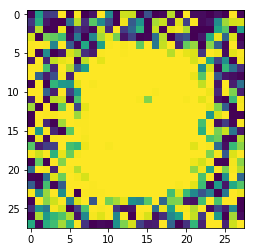

In [64]:
gan.train(epochs= 2000)
gan.output()

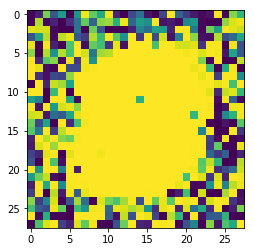

In [92]:
gan.output()